# Question: Does playing home/away have an association with offensive performance in the NFL?

## Basic attributes of this dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import sklearn as sk

In [2]:
sns.set(rc={'figure.figsize':(5.5, 3.5)})

In [3]:
nfl_offensive_stats= pd.read_csv('nfl_offensive_stats.csv')

In [4]:
nfl_offensive_stats.head()

,game_id,player_id,position,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
1,201909050chi,JoneAa00,RB,Aaron Jones,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
2,201909050chi,ValdMa00,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
3,201909050chi,AdamDa01,WR,Davante Adams,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
4,201909050chi,GrahJi00,TE,Jimmy Graham,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019


In [5]:
nfl_offensive_stats.isnull().sum(axis=0).sum()

#there are only 46 pieces of missing data from the stats, and we can easily see it belongs to Vegas_Favorite 
    #thus it is irrelevant to my analysis. 

46

As we can see, there are 0 missing values in the data pertaining to my analysis

In [6]:
nfl_offensive_stats.columns

Index(['game_id', 'player_id', 'position ', 'player', 'team', 'pass_cmp',
       'pass_att', 'pass_yds', 'pass_td', 'pass_int', 'pass_sacked',
       'pass_sacked_yds', 'pass_long', 'pass_rating', 'rush_att', 'rush_yds',
       'rush_td', 'rush_long', 'targets', 'rec', 'rec_yds', 'rec_td',
       'rec_long', 'fumbles_lost', 'rush_scrambles', 'designed_rush_att',
       'comb_pass_rush_play', 'comb_pass_play', 'comb_rush_play',
       'Team_abbrev', 'Opponent_abbrev', 'two_point_conv', 'total_ret_td',
       'offensive_fumble_recovery_td', 'pass_yds_bonus', 'rush_yds_bonus',
       'rec_yds_bonus', 'Total_DKP', 'Off_DKP', 'Total_FDP', 'Off_FDP',
       'Total_SDP', 'Off_SDP', 'pass_target_yds', 'pass_poor_throws',
       'pass_blitzed', 'pass_hurried', 'rush_yds_before_contact', 'rush_yac',
       'rush_broken_tackles', 'rec_air_yds', 'rec_yac', 'rec_drops', 'offense',
       'off_pct', 'vis_team', 'home_team', 'vis_score', 'home_score', 'OT',
       'Roof', 'Surface', 'Temperature', 'H

In [7]:
nfl_offensive_stats = nfl_offensive_stats.rename(columns = {'position ': 'position'}) 


### Creating all the columns that may be helpful

In [8]:
nfl_offensive_stats.head()

,game_id,player_id,position,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
1,201909050chi,JoneAa00,RB,Aaron Jones,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
2,201909050chi,ValdMa00,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
3,201909050chi,AdamDa01,WR,Davante Adams,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
4,201909050chi,GrahJi00,TE,Jimmy Graham,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019


In [9]:
#creating a column of Booleans. 

nfl_offensive_stats['player_is_home'] = nfl_offensive_stats['home_team'] == nfl_offensive_stats['team']

#the next column indicates whether the player is home or away: conveys equivalent information as previous column
nfl_offensive_stats['home_or_away'] = nfl_offensive_stats['player_is_home'].apply(lambda x: 'home' if x==True
                                                                                 else 'away')
#creating a column that indicates the difference of scores
nfl_offensive_stats['h-a_score'] = nfl_offensive_stats['home_score']-nfl_offensive_stats['vis_score']

In [10]:
#creating a column that indicates the score of the team of the player 
nfl_offensive_stats['score'] = nfl_offensive_stats.apply(lambda x: x['home_score'] if x['home_team'] == x['team']
                                                        else x['vis_score'], axis=1)

#score premium for a team (how many extra points the team the player represents gains) 
nfl_offensive_stats['score_diff'] = nfl_offensive_stats.apply(lambda x: x['h-a_score'] if x['home_team'] == x['team']
                                                        else -x['h-a_score'], axis=1)


In [11]:
correlations = pd.DataFrame(nfl_offensive_stats.corrwith(nfl_offensive_stats['player_is_home']).sort_values())

correlations = correlations.reset_index()

In [12]:
correlations = correlations.rename(columns = {'index': 'attribute'})
correlations = correlations.rename(columns = {0: 'correlation'})

In [13]:
correlations.sort_values(by = 'correlation').head(5)

,attribute,correlation
0,vis_score,-0.011383
1,pass_sacked,-0.007411
2,offensive_fumble_recovery_td,-0.007124
3,rec_long,-0.006783
4,pass_sacked_yds,-0.006057


In [14]:
correlations.sort_values(by = 'correlation', ascending = False).head(5)

,attribute,correlation
59,player_is_home,1.000000
58,score_diff,0.045954
57,score,0.031394
56,rec_drops,0.013304
55,h-a_score,0.012471


### Data aggregation 

In [15]:
# sum_columns = ['pass_att','pass_yds','pass_td','pass_sacked','pass_sacked_yds','rush_att','rush_yds'\
              # ,'rush_td','rec', 'score_diff']

In [16]:
ag_stats = nfl_offensive_stats.groupby(['team', 'game_id', 'home_or_away']).mean()
#aggregated based on team, game, and home_or_away

ag_stats = ag_stats.reset_index(level = 2)
ag_stats #shaped in a good format 

home_or_away  pass_cmp  pass_att   pass_yds   pass_td  \
team game_id                                                              
ARI  201909080crd         home  2.900000  5.400000  30.800000  0.200000   
     201909150rav         away  2.272727  3.636364  31.727273  0.000000   
     201909220crd         home  2.500000  3.583333  14.416667  0.166667   
     201909290crd         home  2.200000  3.200000  24.100000  0.000000   
     201910060cin         away  2.000000  3.200000  25.300000  0.000000   
...                        ...       ...       ...        ...       ...   
WAS  202112120was         home  1.071429  2.428571  12.500000  0.071429   
     202112210phi         away  1.538462  2.384615  14.923077  0.000000   
     202112260dal         away  1.071429  2.285714  13.428571  0.142857   
     202201020was         home  2.076923  2.769231  19.000000  0.000000   
     202201090nyg         away  0.692308  1.384615   9.230769  0.000000   

                   pass_int  pass_sacked  pass_sacked_yds  pass_long  \
team game_id                                                           
ARI  201909080crd  0.100000     0.500000         3.300000   4.500000   
     201909150rav  0.000000     0.272727         1.818182   4.909091   
     201909220crd  0.166667     0.666667         3.833333   1.916667   
     201909290crd  0.100000     0.400000         3.500000   3.100000   
     201910060cin  0.000000     0.100000         0.500000   2.800000   
...                     ...          ...              ...        ...   
WAS  202112120was  0.071429     0.357143         3.642857   4.428571   
     202112210phi  0.000000     0.153846         1.538462   3.538462   
     202112260dal  0.142857     0.357143         1.142857   4.785714   
     202201020was  0.076923     0.230769         2.230769   1.923077   
     202201090nyg  0.000000     0.230769         1.615385   3.076923   

                   pass_rating  ...   OT  Temperature  Humidity  Wind_Speed  \
team game_id                    ...                                           
ARI  201909080crd     7.520000  ...  1.0         72.0      45.0         0.0   
     201909150rav     8.227273  ...  0.0         82.0      60.0         8.0   
     201909220crd     6.091667  ...  0.0         72.0      45.0         0.0   
     201909290crd     7.770000  ...  0.0         72.0      45.0         0.0   
     201910060cin     8.710000  ...  0.0         76.0      68.0         6.0   
...                        ...  ...  ...          ...       ...         ...   
WAS  202112120was     8.528571  ...  0.0         48.0      32.0        17.0   
     202112210phi     6.300000  ...  0.0         42.0      57.0         7.0   
     202112260dal    11.192857  ...  0.0         72.0      45.0         0.0   
     202201020was     6.276923  ...  0.0         62.0      91.0         4.0   
     202201090nyg     5.500000  ...  0.0         38.0      64.0         0.0   

                   Vegas_Line  Over_Under  player_is_home  h-a_score  score  \
team game_id                                                                  
ARI  201909080crd        -2.5        45.5             1.0        0.0   27.0   
     201909150rav       -13.0        46.0             0.0        6.0   17.0   
     201909220crd        -2.5        46.0             1.0      -18.0   20.0   
     201909290crd        -5.5        49.0             1.0      -17.0   10.0   
     201910060cin        -3.0        45.0             0.0       -3.0   26.0   
...                       ...         ...             ...        ...    ...   
WAS  202112120was        -4.5        48.0             1.0       -7.0   20.0   
     202112210phi        -6.5        42.0             0.0       10.0   17.0   
     202112260dal       -10.0        46.5             0.0       42.0   14.0   
     202201020was        -4.5        44.5             1.0       -4.0   16.0   
     202201090nyg        -7.0        37.5             0.0      -15.0   22.0   

                   score_diff  
team game_id     

# EDA

## Question 1: Does playing home vs. away affect individual performance? 

Firstly, note that the Total SDP (fantasy points) is a very good summarizer of how a team performs 

In [17]:
nfl_offensive_stats[['Total_SDP']].head()

,Total_SDP
0,12.92
1,4.40
2,7.20
3,5.60
4,10.50


In [18]:
key_position_stats = nfl_offensive_stats.loc[nfl_offensive_stats['position'].isin(['QB', 'RB', 'WR', 'TE']), :]
# 'QB', 'RB', 'WR', 'TE' are the most important positions 

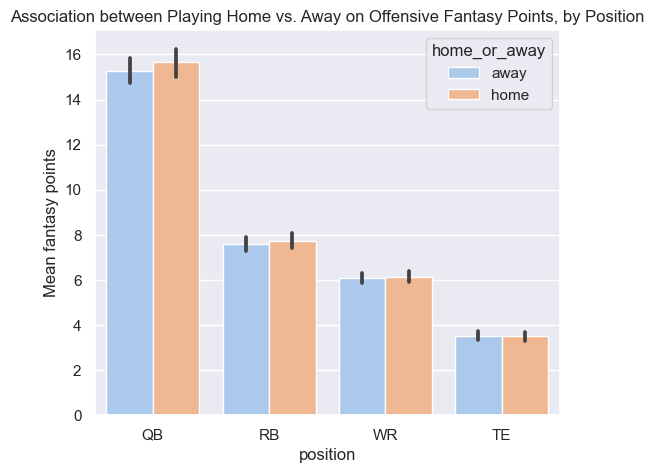

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize = (6,5))
a = sns.barplot(data = key_position_stats, x = 'position', y = 'Total_SDP', hue = 'home_or_away', palette = 'pastel'); 
a.set_ylabel('Mean fantasy points');
a.set_title('Association between Playing Home vs. Away on Offensive Fantasy Points, by Position');

However, a natural question to ask is, while in aggregate, players do not benefit much from playing home or away, does it impact each player differently? What is the variation in performance based on player? 

In [20]:
nfl_offensive_stats['home_or_away']

0        away
1        away
2        away
3        away
4        away
         ... 
19968    away
19969    away
19970    home
19971    home
19972    home
Name: home_or_away, Length: 19973, dtype: object

In [21]:
player_data = (nfl_offensive_stats.groupby(['player_id', 'position','home_or_away'])[['Total_SDP']].mean()).reset_index(level=2).pivot(columns= 'home_or_away').dropna(axis=0) 
player_data['h-a_fantasy_points'] = player_data[('Total_SDP','home')] - player_data[('Total_SDP','away')]
player_data = player_data.reset_index(level = 1)
player_data
#this gives us each player's performance by away and home performance 

position  Total_SDP            h-a_fantasy_points
home_or_away                away       home                   
player_id                                                     
AbduAm00           RB   3.558333   2.250000          -1.308333
AdamDa01           WR  19.127273  19.048000          -0.079273
AdamJo03           RB   5.340000   2.025000          -3.315000
AghoNe00           WR   6.165217   9.475000           3.309783
AgneJa00           CB   0.900000   0.300000          -0.600000
...               ...        ...        ...                ...
ZaccOl01           WR   3.478947   3.821053           0.342105
ZennZa00           RB   1.500000  -0.300000          -1.800000
ZubeIs00           WR   1.300000   1.700000           0.400000
ZylsBr00           WR   1.222222   2.356250           1.134028
ZylsSh00           TE   1.400000   2.100000           0.700000

[888 rows x 4 columns]

In [22]:
relevant_player_data = player_data.loc[nfl_offensive_stats.player_id.value_counts()>20]
#we will only consider the players who have played in more than twenty games to avoid outliers skewing the data

In [23]:
relevant_player_data = relevant_player_data[relevant_player_data.position.isin(['RB', 'QB', 'WR', 'TE'])]

In [24]:
relevant_player_data['h-a_fantasy_points'].describe()

count    418.000000
mean       0.140880
std        1.852931
min       -7.401905
25%       -0.887277
50%        0.150556
75%        1.098437
max        7.714667
Name: h-a_fantasy_points, dtype: float64

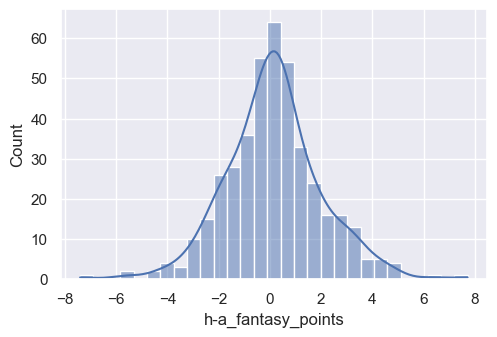

In [25]:
a = sns.histplot(relevant_player_data.reset_index(), x='h-a_fantasy_points', kde = True)

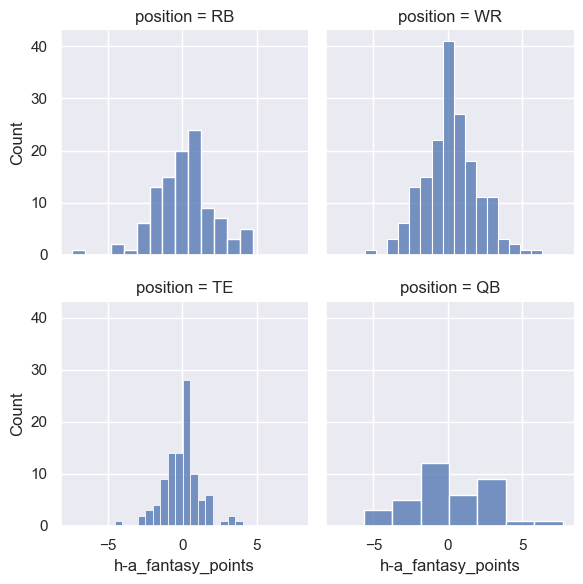

In [26]:
a = sns.FacetGrid(data = relevant_player_data ,col='position', col_wrap = 2)
a.map(sns.histplot, 'h-a_fantasy_points')

#### Observations: 

Players perform slightly better in home games than away games, but the effect is minimal. 

Player performance does vary by player, and the variation is a normal distribution for most players and most positions. 

No recommendation for this section, as nothing useful was found. 

## Q2:  Score difference analysis between home and away teams

In [27]:
#firstly, lets aggregate it to a game by game basis  

game_stats = (nfl_offensive_stats.groupby('game_id').mean()).drop(columns = ['score_diff', 'score'])
 

In [28]:
game_stats.head()

,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,rush_att,...,vis_score,home_score,OT,Temperature,Humidity,Wind_Speed,Vegas_Line,Over_Under,player_is_home,h-a_score
game_id,,,,,,,,,,,,,,,,,,,,,
201909050chi,1.833333,3.125000,17.958333,0.041667,0.041667,0.416667,2.375000,3.083333,6.395833,1.541667,...,10.0,3.0,0.0,65.0,69.0,10.0,-3.5,47.0,0.500000,-7.0
201909080car,2.400000,3.850000,21.250000,0.050000,0.100000,0.200000,1.300000,2.050000,7.055000,2.750000,...,30.0,27.0,0.0,87.0,53.0,3.0,-1.5,49.5,0.500000,-3.0
201909080cle,1.625000,2.583333,22.208333,0.166667,0.125000,0.375000,3.041667,4.583333,8.220833,2.000000,...,43.0,13.0,0.0,71.0,55.0,10.0,-5.5,44.0,0.416667,-30.0
201909080crd,2.434783,4.304348,30.130435,0.217391,0.043478,0.347826,2.478261,4.000000,8.052174,2.391304,...,27.0,27.0,1.0,72.0,45.0,0.0,-2.5,45.5,0.434783,0.0
201909080dal,2.416667,3.333333,30.333333,0.208333,0.000000,0.041667,0.166667,4.625000,14.004167,1.958333,...,17.0,35.0,0.0,72.0,45.0,0.0,-7.0,44.0,0.500000,18.0


In [29]:
#some basic statistics to start us off 

print(game_stats['h-a_score'].median())
print(game_stats['h-a_score'].mean())
print(np.percentile(game_stats['h-a_score'], 25))
print(np.percentile(game_stats['h-a_score'], 75))

1.0
0.675609756097561
-7.0
10.0


Based on the above, since the median of home score - away score is 1, with a mean of 0.675, and the 75 percentile is 10 while the 25 percentile is -7, it seems like home teams do perform slightly better on average than away teams. Let's check the score distribution to verify it. 

the median score differnece is 1.0
the mean score difference is 0.675609756097561
the 25th percentile is -7.0
the 75th percentile is 10.0


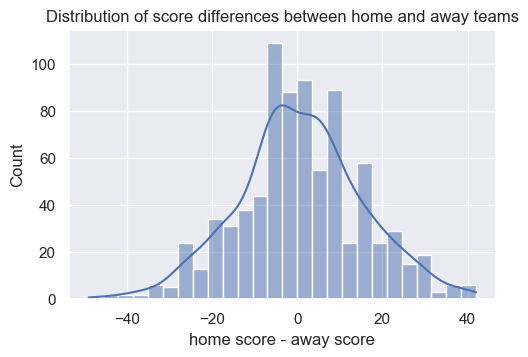

In [30]:
sns.histplot(data = game_stats, x = 'h-a_score', kde= True, label = 'home score - away score')

plt.xlabel('home score - away score');
plt.title('Distribution of score differences between home and away teams');

print('the median score differnece is ' + str(game_stats['h-a_score'].median()))
print('the mean score difference is ' + str(game_stats['h-a_score'].mean()))
print('the 25th percentile is ' + str(np.percentile(game_stats['h-a_score'], 25)))
print('the 75th percentile is ' + str(np.percentile(game_stats['h-a_score'], 75)))

In [31]:
min(game_stats['h-a_score']), max(game_stats['h-a_score'])   #tells us minimum and max score 

(-49.0, 42.0)

Based on this graph, it seems that it tends to be that the frequency of large wins occurs more frequently for home games than for away games. I'll bin it to have a better view of the data. 

In [32]:
game_stats[game_stats['h-a_score']>0].shape[0]/game_stats.shape[0]



0.5097560975609756

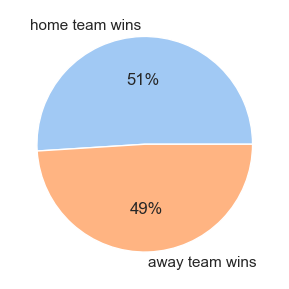

In [33]:
#this plot indicates the rough percentage of games where home team wins vs. visting team wins 
plt.pie([51, 49], labels= ['home team wins','away team wins'], colors = sns.color_palette('pastel')[0:5], autopct='%.0f%%'); 

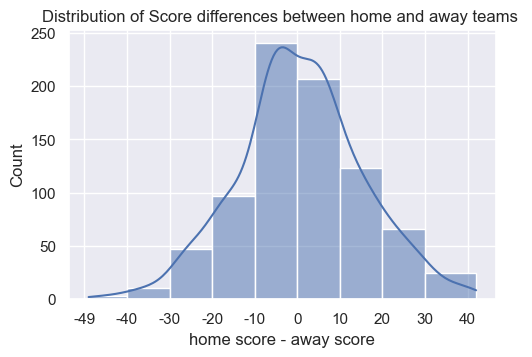

In [34]:
a = sns.histplot(data = game_stats, bins = [-49, -40, -30, -20, -10, 0,10, 20, 30, 42], x = 'h-a_score', kde = True, label = 'home score - away score')
a.set_xticks(ticks = [-50, -40, -30, -20, -10, 0, 10, 20, 30, 40], labels = [-49, -40, -30, -20, -10, 0, 10, 20, 30, 40]); 
a.set_title('Distribution of Score differences between home and away teams ');
a.set_xlabel('home score - away score');

In [2]:
# lets calculate the specific values. 

print((game_stats['h-a_score'] >= 10).sum()/(game_stats['h-a_score'] <= -10).sum())

NameError: name 'game_stats' is not defined

The result indicates that home teams have a 22% higher chance of winning by more than 10 points than away teams do. 

In [1]:
print(((game_stats['h-a_score'] > -10) & (game_stats['h-a_score'] < 0)).sum()/((game_stats['h-a_score'] < 10) & (game_stats['h-a_score'] > 0)).sum())

NameError: name 'game_stats' is not defined

This result indicates, however, that away teams have a 9.3% higher chance of winning by less than 10 points than home team do. 

#### Observations 

1) While large wins are more likely for home teams than for away teams, home teams also have a higher chance of losing by a small margin than winning by a small margin. 

2) Specifically, home teams have a 22% higher chance of winning by more than 10 points than away teams do, but that away teams have a 9.3% higher chance of winning by less than 10 points than home team do.

### Why do home teams lose by a small margin more often than they win by a small margin? 

In [79]:
ag_stats_sum = nfl_offensive_stats.groupby(['team', 'game_id', 'home_or_away']).sum()
ag_stats_sum = ag_stats_sum.reset_index(level = 2)

In [80]:
#stats for games where home team lost by small margin

ag_stats_sum1 = ag_stats_sum[(ag_stats['h-a_score']> -10) & (ag_stats['h-a_score']< 0)].reset_index(level =0).groupby(['game_id', 'home_or_away']).mean()

In [81]:
ag_stats_sum1.reset_index(level=1).groupby('home_or_away').mean().T

home_or_away,away,home
pass_cmp,22.125561,23.067265
pass_att,33.466368,37.017937
pass_yds,253.300448,254.753363
pass_td,1.605381,1.439462
pass_int,0.560538,0.928251
pass_sacked,1.883408,2.587444
pass_sacked_yds,12.000000,18.017937
pass_long,40.820628,42.717489
pass_rating,108.117937,105.052466
rush_att,29.681614,23.721973


In [83]:
print(2.587/1.883)
print(0.609865/0.376682)

1.3738714816781732
1.619044711454224


On average, home team has a 37% higher chance of gettting sacked, and also loses 50% more yards from getting sacked. The home team has a shocking 62% higher chance of fumbling. Additionally, the away team rushes on average 20 more yards per game than the home team. 


#### Observations: 

Passing statistics are basically the same for both teams. 

Home team is making more mistakes: fumbling more, getting sacked more, throwing more interceptions, and throwing more poor throws, and the home team is dropping the ball more. 

Additionally, the away team rushes on average 20 more yards per game than home team, which is significant considering the win by only a slight margin. 

Based on this, we can conclude that in games where home team loses to the away team by a small margin, it is highly associated with offensive mistakes. Additionally, while the home team has similar passing as the away team, the visiting team is significantly stronger in rushing. 

### Recommendations: 

1) Coaches should take note that while home teams are more aggressive and tend to score more than visiting teams, they may also make more mistakes. 

2) In a game where a home team is losing by a small margin, the home team should focus more on composure and better rushes, than improving passing. 

## Question 3: Does the effect of playing home vs away vary by team? 

In [85]:
ag_stats.head()

home_or_away  pass_cmp  pass_att   pass_yds   pass_td  \
team game_id                                                              
ARI  201909080crd         home  2.900000  5.400000  30.800000  0.200000   
     201909150rav         away  2.272727  3.636364  31.727273  0.000000   
     201909220crd         home  2.500000  3.583333  14.416667  0.166667   
     201909290crd         home  2.200000  3.200000  24.100000  0.000000   
     201910060cin         away  2.000000  3.200000  25.300000  0.000000   

                   pass_int  pass_sacked  pass_sacked_yds  pass_long  \
team game_id                                                           
ARI  201909080crd  0.100000     0.500000         3.300000   4.500000   
     201909150rav  0.000000     0.272727         1.818182   4.909091   
     201909220crd  0.166667     0.666667         3.833333   1.916667   
     201909290crd  0.100000     0.400000         3.500000   3.100000   
     201910060cin  0.000000     0.100000         0.500000   2.800000   

                   pass_rating  ...   OT  Temperature  Humidity  Wind_Speed  \
team game_id                    ...                                           
ARI  201909080crd     7.520000  ...  1.0         72.0      45.0         0.0   
     201909150rav     8.227273  ...  0.0         82.0      60.0         8.0   
     201909220crd     6.091667  ...  0.0         72.0      45.0         0.0   
     201909290crd     7.770000  ...  0.0         72.0      45.0         0.0   
     201910060cin     8.710000  ...  0.0         76.0      68.0         6.0   

                   Vegas_Line  Over_Under  player_is_home  h-a_score  score  \
team game_id                                                                  
ARI  201909080crd        -2.5        45.5             1.0        0.0   27.0   
     201909150rav       -13.0        46.0             0.0        6.0   17.0   
     201909220crd        -2.5        46.0             1.0      -18.0   20.0   
     201909290crd        -5.5        49.0             1.0      -17.0   10.0   
     201910060cin        -3.0        45.0             0.0       -3.0   26.0   

                   score_diff  
team game_id                   
ARI  201909080crd         0.0  
     201909150rav        -6.0  
     201909220crd       -18.0  
     201909290crd       -17.0  
     201910060cin         3.0  

[5 rows x 61 columns]

In [86]:
team_ag_stats = ag_stats.reset_index(level = [0,1]).groupby(['team', 'home_or_away']).mean()  #aggregating game stats 

In [87]:
team_score_stats = team_ag_stats.reset_index(level=1).pivot(columns = 'home_or_away', values = 'score_diff')

team_score_stats['extra_net_points'] = team_score_stats['home']-team_score_stats['away']

In [88]:
team_score_stats.head()

home_or_away,away,home,extra_net_points
team,,,
ARI,3.423077,-2.791667,-6.214744
ATL,-3.440000,-4.000000,-0.560000
BAL,8.000000,6.846154,-1.153846
BUF,6.962963,7.535714,0.572751
CAR,-5.280000,-6.250000,-0.970000


''

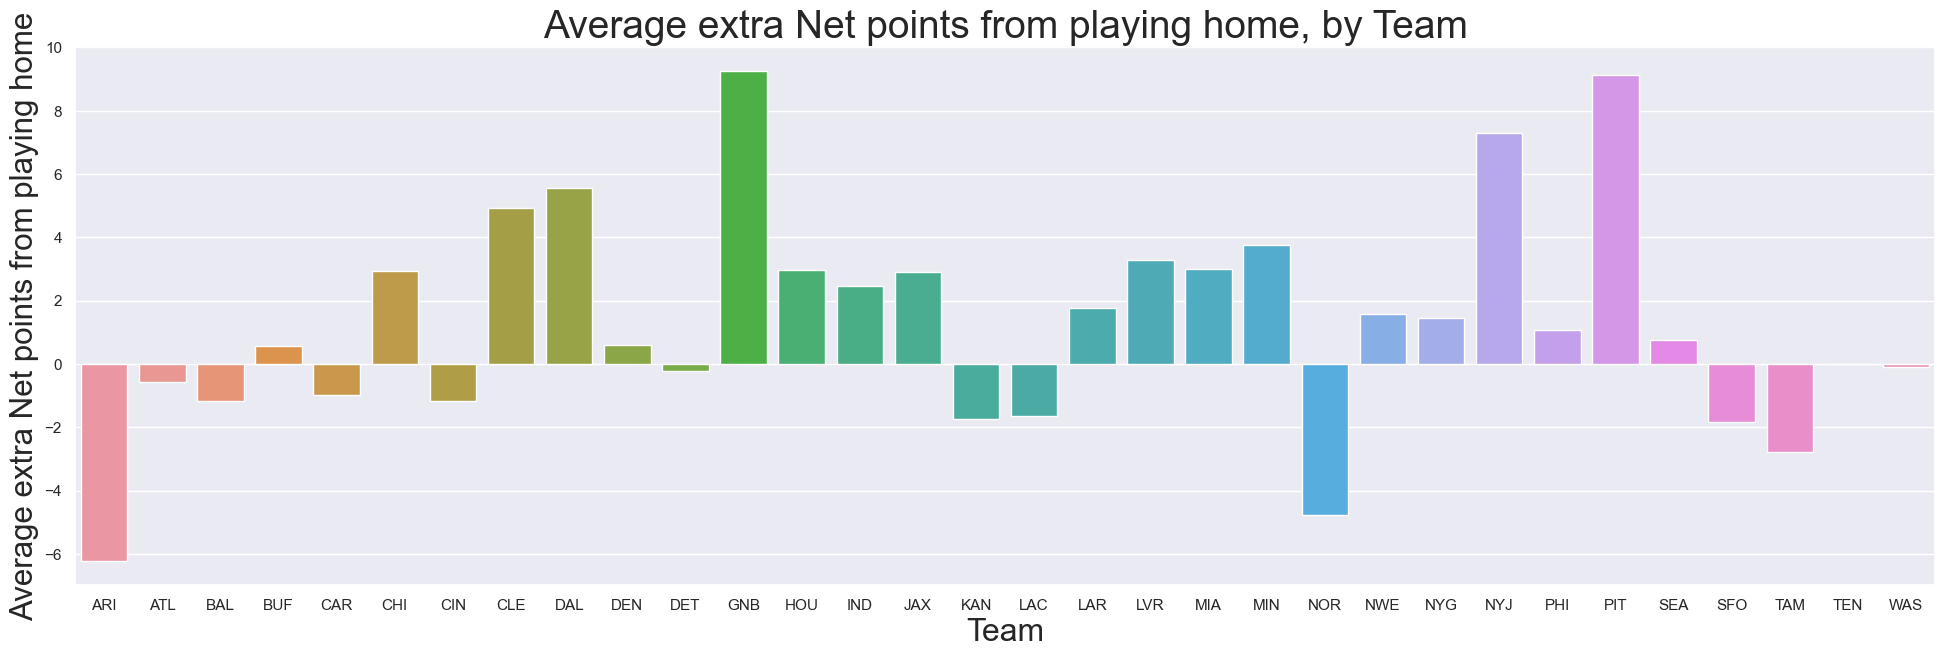

In [89]:
#Saying the equivalent thing as above 

plt.figure(figsize = (24,7))
a = sns.barplot(data = team_score_stats, x = team_score_stats.index, y = 'extra_net_points'); 
a.set_ylabel('Average extra Net points from playing home', fontsize=22.5);
a.set_xlabel('Team', fontsize=23)
a.set_title('Average extra Net points from playing home, by Team', fontsize= 28)
;

In [90]:
team_score_stats.describe()

home_or_away,away,home,extra_net_points
count,32.000000,32.000000,32.000000
mean,-0.829228,0.487902,1.317130
std,5.865277,5.135998,3.503844
min,-13.750000,-8.520000,-6.214744
25%,-4.820000,-3.684829,-1.015962
50%,-0.868234,0.520000,0.917863
75%,3.446937,4.644231,2.965513
max,8.416667,9.571429,9.263736


#### Observations

Based on the above graphs and data, we can conclude the following: 

Teams gain an average of an extra 1.32 net points simply from playing home. 

However, the average extra net points from playing home varies significantly across team, with a standard deviation of 3.5 points across teams. 



### What do the teams that have extra points from playing home have in common?



In [91]:
stats_by_team = ag_stats_sum.reset_index(level = [0,1]).groupby(['team']).mean()
stats_by_team['extra_net_points'] = team_score_stats['extra_net_points']

In [3]:
stats_by_team.corrwith(stats_by_team['extra_net_points']).sort_values().head(10).plot()

NameError: name 'stats_by_team' is not defined

In [118]:
stats_by_team.corrwith(stats_by_team['extra_net_points']).sort_values().tail(10)

pass_poor_throws    0.165587
two_point_conv      0.167924
rec_drops           0.170837
home_score          0.205197
Wind_Speed          0.231102
pass_blitzed        0.237476
total_ret_td        0.261380
off_pct             0.264482
h-a_score           0.979404
extra_net_points    1.000000
dtype: float64

#### Observations: 

The variables that are negatively correlated with extra net points tend to be variables that are indicative of good offensive performance, while the variables that are positively correlated with extra net points tend to be variables that are indicative of poor offensive performance. 

Therefore, teams that have a large score difference between playing home and away tend to be teams that perform poorly, while teams that have a small score difference between playing home and away tend to be teams that perform better. 

Thus, we can conclude that the home vs away effect actually impacts teams that perform poorly more than teams that are performing well. 

### Recommendations:  

For sports bettors: 

The Arizona Cardinals, New Orleans Saints are teams that peform significantly worse at home than away. Thus when betting on these teams, lean towards betting a lost for these teams when they are playing home. 

The Green Bay Packers, New York Jets, and Pittsburgh Steelers are teams that perform significantly better at home than away. When betting for these teams,lean towards betting a win for these teams when they are playing home. 

In general though, teams that are performing poorly are more likely to perform significantly worse away than at home (equivalently, better at home than away). 